In [1]:
from main import RecyclingModel
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:>

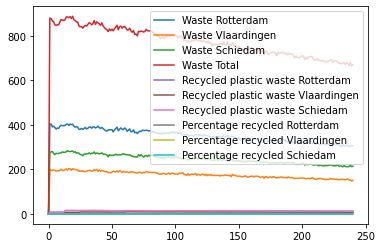

In [2]:
recycling = RecyclingModel()

no_steps = 240

for i in range(no_steps):
    recycling.step()

results = recycling.datacollector_waste.get_model_vars_dataframe()
results.plot()

In [3]:
results = results[1:241]

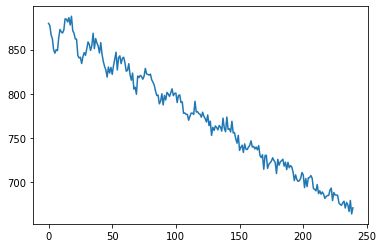

In [4]:
# line 1 points
x1 = range(len(results))
y1 = results['Waste Total']
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")

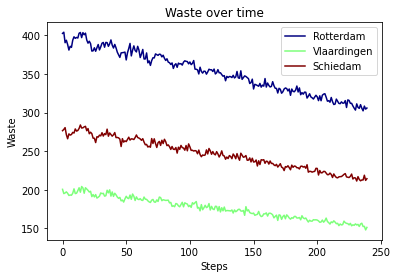

<Figure size 576x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [5]:
num_plots = 3

# Have a look at the colormaps here and decide which one you'd like:
# http://matplotlib.org/1.2.1/examples/pylab_examples/show_colormaps.html
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

# Plot several different functions...
labels = []

x = range(len(results))



plt.title('Waste over time')
plt.xlabel('Steps')
plt.ylabel('Waste')

plt.plot(x, results['Waste Rotterdam'], label='Rotterdam')
plt.plot(x, results['Waste Vlaardingen'], label='Vlaardingen')
plt.plot(x, results['Waste Schiedam'], label='Schiedam')
    #labels.append(r'$y = %ix + %i$' % (i, 5*i))
plt.legend()


plt.figure(figsize=(8,4))

plt.show()
plt.savefig('verificatie_wastepercity.png')

In [6]:
agent_df = recycling.datacollector_waste.get_agent_vars_dataframe()
throughput = agent_df.copy()
agent_df = agent_df[agent_df['Perception'] != 0]
agent20 = agent_df.tail(22)

agent20['number_agent'] = 0
for i in range(len(agent20)):
    agent20['number_agent'][i] = i
    

lijst = list(range(22)) * 241
agent_df['number_agent']= lijst

C:\Users\Sarah\AppData\Local\Temp\ipykernel_4460\2757625217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent20['number_agent'] = 0
C:\Users\Sarah\AppData\Local\Temp\ipykernel_4460\2757625217.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent20['number_agent'][i] = i


Perception  \
Step AgentID                                                          
0    Rotterdam                                             0.000000   
     (<municipality.Municipality object at 0x0000017...    0.698178   
     (<municipality.Municipality object at 0x0000017...    0.520630   
     (<municipality.Municipality object at 0x0000017...    0.547341   
     (<municipality.Municipality object at 0x0000017...    0.497348   

                                                         Knowledge  \
Step AgentID                                                         
0    Rotterdam                                            0.000000   
     (<municipality.Municipality object at 0x0000017...   0.355583   
     (<municipality.Municipality object at 0x0000017...   0.590062   
     (<municipality.Municipality object at 0x0000017...   0.248964   
     (<municipality.Municipality object at 0x0000017...   0.559083   

                                                         Fraction recycled plastic  \
Step AgentID                                                                         
0    Rotterdam                                                                 0.0   
     (<municipality.Municipality object at 0x0000017...                        0.0   
     (<municipality.Municipality object at 0x0000017...                        0.0   
     (<municipality.Municipality object at 0x0000017...                        0.0   
     (<municipality.Municipality object at 0x0000017...                        0.0   

                                                                                                     Agent  \
Step AgentID                                                                                                 
0    Rotterdam                                                                                   Rotterdam   
     (<municipality.Municipality object at 0x0000017...  (<municipality.Municipality object at 0x000001...   
     (<municipality.Municipality object at 0x0000017...  (<municipality.Municipality object at 0x000001...   
     (<municipality.Municipality object at 0x0000017...  (<municipality.Municipality object at 0x000001...   
     (<municipality.Municipality object at 0x0000017...  (<municipality.Municipality object at 0x000001...   

                                                         Filtered  
Step AgentID                                                       
0    Rotterdam                                                0.0  
     (<municipality.Municipality object at 0x0000017...       0.0  
     (<municipality.Municipality object at 0x0000017...       0.0  
     (<municipality.Municipality object at 0x0000017...       0.0  
     (<municipality.Municipality object at 0x0000017...       0.0

In [18]:
beta = throughput[throughput['Agent'] == 'beta']

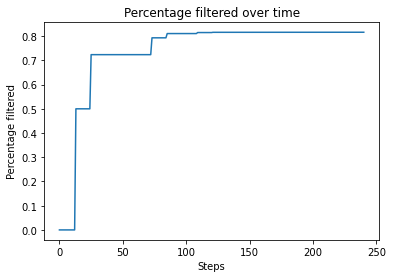

In [21]:
# line 1 points
x1 = range(len(beta))
y1 = beta['Filtered']


# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")

plt.title('Percentage filtered over time')
plt.xlabel('Steps')
plt.ylabel('Percentage filtered')

plt.savefig('verificatie_percentagefilterd.png')

In [8]:
grouped = agent_df.reset_index()
sort = grouped.sort_values(by=['number_agent'])
sort.head()

,Step,AgentID,Perception,Knowledge,Fraction recycled plastic,Agent,Filtered,number_agent
0,0,(<municipality.Municipality object at 0x000001...,0.698178,0.355583,0.000000,(<municipality.Municipality object at 0x000001...,0.0,0
4730,215,(<municipality.Municipality object at 0x000001...,0.698178,0.355583,0.074478,(<municipality.Municipality object at 0x000001...,0.0,0
3278,149,(<municipality.Municipality object at 0x000001...,0.698178,0.355583,0.074478,(<municipality.Municipality object at 0x000001...,0.0,0
1870,85,(<municipality.Municipality object at 0x000001...,0.698178,0.355583,0.074478,(<municipality.Municipality object at 0x000001...,0.0,0
506,23,(<municipality.Municipality object at 0x000001...,0.698178,0.355583,0.074478,(<municipality.Municipality object at 0x000001...,0.0,0


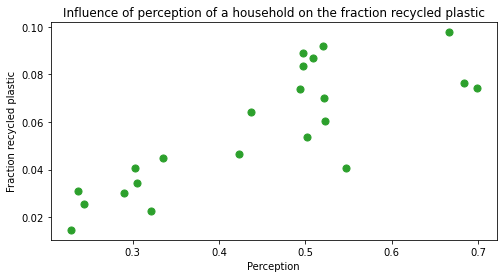

In [9]:
agent20.plot.scatter(x= "Perception", y='Fraction recycled plastic', s=50,c='#2ca02c', figsize=(8,4))
plt.title('Influence of perception of a household on the fraction recycled plastic')
plt.savefig('verificatie_perceptionperagent.png')

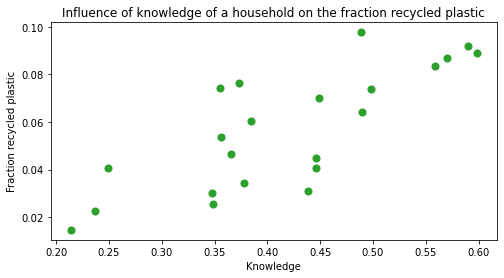

In [10]:
agent20.plot.scatter(x= "Knowledge", y='Fraction recycled plastic', s=50,c='#2ca02c', figsize=(8,4))
plt.title('Influence of knowledge of a household on the fraction recycled plastic')
plt.savefig('verificatie_knowledgeperagent.png')

C:\Users\Sarah\AppData\Local\Temp\ipykernel_4460\1616890758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent20['K*P'] = agent20['Perception'] * agent20['Knowledge']


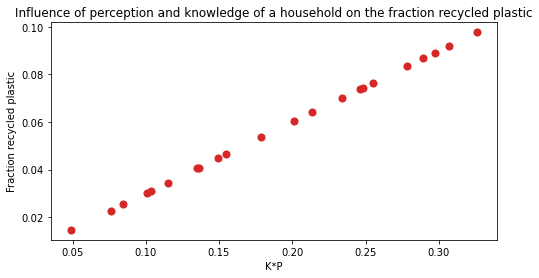

In [11]:
agent20['K*P'] = agent20['Perception'] * agent20['Knowledge']

agent20.plot.scatter(x= "K*P", y='Fraction recycled plastic', s=50,c='#d62728', figsize=(8,4))
plt.title('Influence of perception and knowledge of a household on the fraction recycled plastic')
plt.savefig('verificatie_perceptionandknowledgeperagent.png')